In [1]:
'''Steps for Linear Regression:
1. *Create the dataframe properly-->pd.read_csv(),pd.read_excel()
2. *Preprocessing the data:
a. Feature selection-->domain knowledge,drop()
b. Handling missing values-->isnull().sum(),fillna(),dropna()
3. Assumption 1: There should be no outliers in the data-->boxplot()
4. *Assumption 2: Assumption of Linearity:Every ind var should have a linear relationship with the dep var-->pairplot(), drop()
5. *Create X and Y-->X=ind var, Y=dep var
6. Assumption 3: Assumption of Normality: The dependent variable should follow an approximate normal distribtion-->distplot(),log()
7. Checking and handling the skewness in the X vars-->skew(),hist(),log1p()
8. Assumption 4: Assumption of no multicollinearity: There should be no multicollinearity between the independent variables-->corr(),heatmap(),vif(),drop()
9. *Splitting the data into train and test(validation)-->train_test_split()
10. *Building the model:
a. Create the model-->obj=AlgoName()
b. Train the model-->obj.fit(X_train, Y_train)
c. Predict using the model-->Y_pred=obj.predict(X_test)
11. *Evaluating the model:
R-squared, Adj R-squared, RMSE, AIC/BIC
12. Assumption 5: There should be no auto-correlation in the data-->Durbin Watson test
13. Assumption 6: Errors should be random-->Fitted v/s Residual plot
14. Assumption 7: Errors should follow an approx normal distribution-->Normal QQ plot
15. Assumption 8: Errors should should follow a constant variance(Homoskedasticity)-->Scale Location plot
16. *Tuning the model:
a. Feature selection-->p-values,domain knowledge
b. Regularization techniques-->Ridge(), Lasso()
c. Stochastic Gradient Descent-->SGDRegressor()'''

'Steps for Linear Regression:\n1. *Create the dataframe properly-->pd.read_csv(),pd.read_excel()\n2. *Preprocessing the data:\na. Feature selection-->domain knowledge,drop()\nb. Handling missing values-->isnull().sum(),fillna(),dropna()\n3. Assumption 1: There should be no outliers in the data-->boxplot()\n4. *Assumption 2: Assumption of Linearity:Every ind var should have a linear relationship with the dep var-->pairplot(), drop()\n5. *Create X and Y-->X=ind var, Y=dep var\n6. Assumption 3: Assumption of Normality: The dependent variable should follow an approximate normal distribtion-->distplot(),log()\n7. Checking and handling the skewness in the X vars-->skew(),hist(),log1p()\n8. Assumption 4: Assumption of no multicollinearity: There should be no multicollinearity between the independent variables-->corr(),heatmap(),vif(),drop()\n9. *Splitting the data into train and test(validation)-->train_test_split()\n10. *Building the model:\na. Create the model-->obj=AlgoName()\nb. Train the

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading of Data
data = pd.read_csv(r'C:\Users\avinay shau\AS python\Advertising.csv', 
                   index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

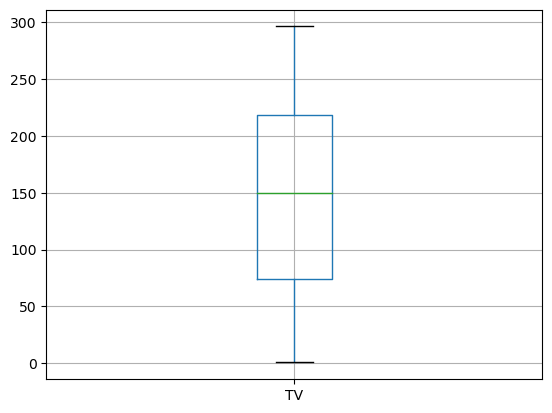

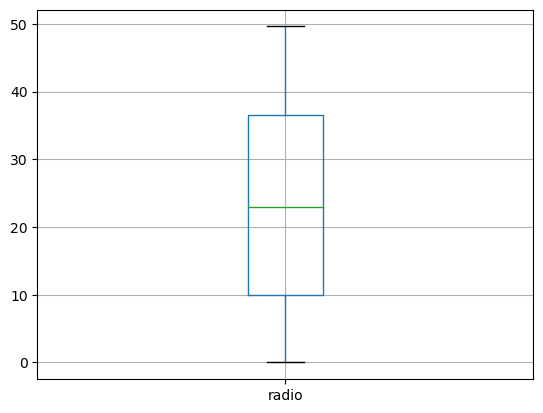

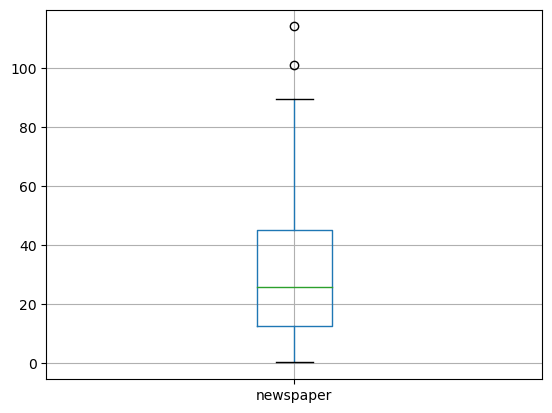

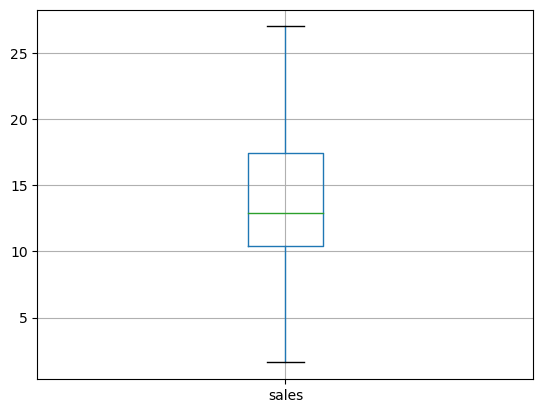

In [6]:
#Assumption 1: There should be no outliers in the data. Check using boxplot
#boxplot is only use for continuous valued variables not for discrete valued variables)
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

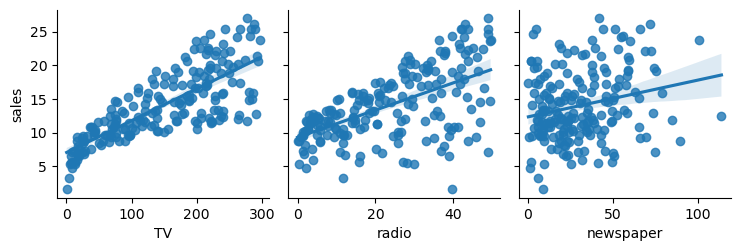

In [7]:
#Assumption 2: Assumption of Linearity:Every ind var should have a linear relationship with dep var
plt.figure(figsize=(20,10))
sns.pairplot(data,x_vars=data.columns[0:-1],y_vars='sales',
            kind='reg')
plt.show()
#newspaper is a problematic variabel coz it does not show relation with sales variabel
#TV and radio show a positive kind of relation 

In [8]:
data.columns[0:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

# Continuation

In [9]:
# create X(independent var) and Y(Dependent Var)
X = data[['TV','radio','newspaper']]
Y = data['sales']
#X=data.iloc[:,0:-1]

C:\Users\avinay shau\AppData\Local\Temp\ipykernel_18816\2781409252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,hist=True)


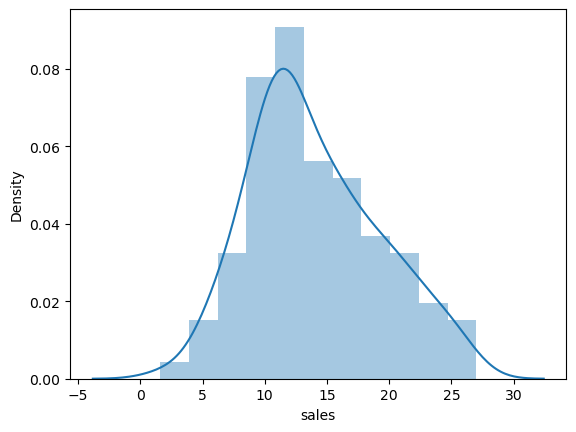

In [10]:
#Assumption 3 of Normality: The dependent variable should follow an approximate normal distribution
sns.distplot(Y,hist=True)
plt.show()

In [11]:
"""
# Log transformation
import numpy as np
Y_log = np.log(Y)
"""
#For log transformation use the numpy log function
#Do it only you have skweed kind of data
#If the assumption of normality is not met then perform log transformation 
#and go ahead with log transfor data 

'\n# Log transformation\nimport numpy as np\nY_log = np.log(Y)\n'

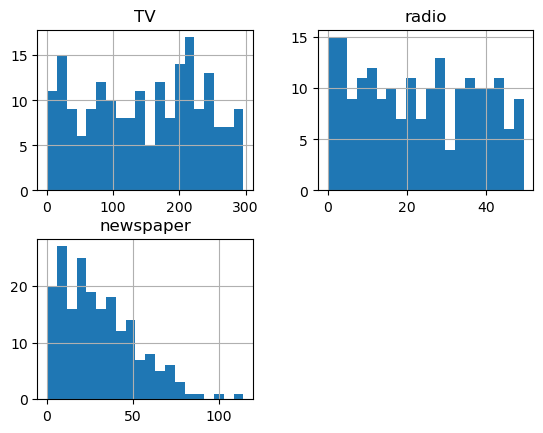

In [12]:
#Checking for skewnees in independent variable
X.hist(bins=20)
plt.show()

In [13]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda x: skew(x.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
#apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\avinay shau\AppData\Local\Temp\ipykernel_18816\1957380878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])


In [14]:
X

,TV,radio,newspaper
1,230.1,37.8,4.251348
2,44.5,39.3,3.830813
3,17.2,45.9,4.252772
4,151.5,41.3,4.085976
5,180.8,10.8,4.084294
...,...,...,...
196,38.2,3.7,2.694627
197,94.2,4.9,2.208274
198,177.0,9.3,2.001480
199,283.6,42.0,4.207673


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


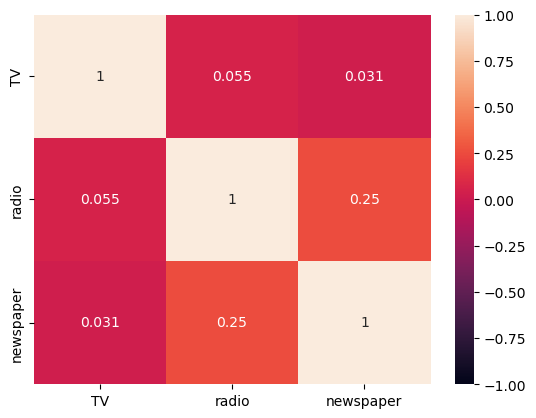

In [15]:
 #Assumption of no mulitcollinearity: There should be no multicolliearity between the independent variable
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

# VIF Function

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df=pd.DataFrame()
vif_df['features']=X.columns
vif_df['VIF Factor']=[vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [17]:
X.shape[1]

3

In [18]:
#X.drop('newspaper',axis=1,inplace=True)
#return the VIF code

In [19]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                   random_state=10)

In [20]:
print(Y_train)

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64


In [21]:
#>1000--test_size=0.3
#<1000--test_size=0.2

In [22]:
#sklearn is parent library, linear_model is a child library
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficiencts
print(lm.intercept_)
print(lm.coef_)

3.353291385815149
[ 0.0437425   0.19303708 -0.04895137]


In [23]:
#pair the feature names wiht the coefficients
print(list(zip(X.columns, lm.coef_)))
#use .ravel() after lm.coef_ to convert 2d array into single dimesion array

[('TV', 0.04374250157742166), ('radio', 0.19303707897345304), ('newspaper', -0.048951368222487905)]


In [24]:
X1=100
X2=100
X3=100
Y_pred=3.353291385815149+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

22.136112385815153


In [25]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [26]:
lm.score(X_train, Y_train) #formula to see the r sqr

0.920898664750022

In [27]:
#Evaluating the model
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df=new_df.reset_index().drop('index',axis=1)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


# Continuation 21/10

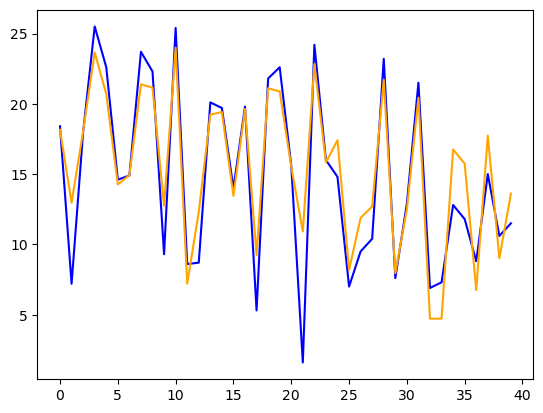

In [28]:
new_df['Actual sales'].plot(color='blue')
new_df['Predicted sales'].plot(color='orange')
plt.show()

# Evaluation Metrics

In [29]:
lm.score(X_train,Y_train)

0.920898664750022

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [31]:
print(Y_test.min())
print(Y_test.max())
#The R sqr nd Adj R sqr  is close to 1 so it is a good model and RMSE is towards the lower end so it is a good model

1.6
25.5


In [32]:
new_df['Residual']=new_df['Actual sales']-new_df['Predicted sales']
new_df.to_excel('Sales Prediction.xlsx',header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [33]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)
#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [34]:
Y_pred=rid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [36]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)
#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [37]:
Y_pred=las.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


# Continuation 22/10

In [39]:
#OLS OLS(Y_train, X_train)
#OLS (Y~X1+X2+X3)

In [40]:
#fit(X_train, Y_train) --sklearn
#Y~X1+X2+X3, data=df --statsmodels

In [41]:
new_df=pd.DataFrame()
new_df=X_train.copy()
new_df['sales']=Y_train.copy()
new_df.shape

(160, 4)

In [42]:
import statsmodels.formula.api as sm
#Create a fitted model wiht all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper',
                 data=new_df).fit()
#print the coeffficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.10e-85
Time:                        12:21:11   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [43]:
#next step to predict the data
Y_pred_new=lm_model.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035377
RMSE: 2.592976911093015
Adj R-square: 0.832272516881653


In [45]:
import statsmodels.formula.api as sm
#Create a fitted model wiht all three features
lm_model = sm.ols(formula='sales ~ TV + radio',
                 data=new_df).fit()
#print the coeffficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.47e-87
Time:                        12:21:11   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [46]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.587881707737811
Adj R-square: 0.8329310387377037


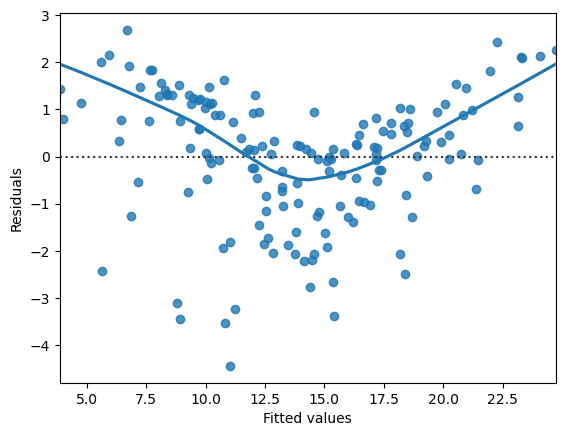

In [47]:
#Not necessary to check these steps but imp for knowledge purpose
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
#The line should be a random line and should not follow a wave kind of pattern

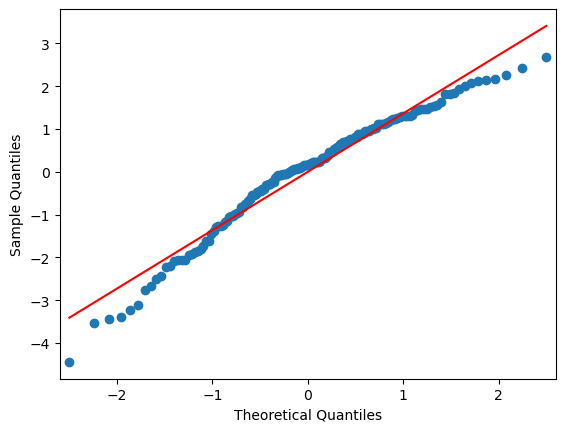

In [48]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot  #QQ stand for quantile quantile plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')  #line =s for indicatind the std distribution line
#the erroe points should follow the red diagonal line
#TEh normal QQ plot is used to compare a given set of values with std normal distributed data(theoretical quantile)

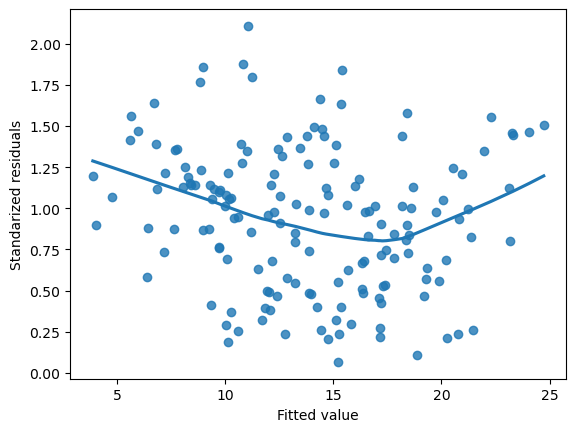

In [50]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()
#The line should be an approximate horizontal line and should not have a stepped angle or a v-shape line